## Imports e Inicialización del DataFrame

In [ ]:
!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import squarify # pip install squarify
import matplotlib.pyplot as plt
%matplotlib inline

# import necesario para graficar mapas 
import geopandas as gpd

     |████████████████████████████████| 972kB 6.0MB/s 
     |████████████████████████████████| 6.5MB 39.2MB/s 
     |████████████████████████████████| 14.8MB 255kB/s 


In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

entrenamientoDf = pd.read_csv('Entrenamieto_ECI_2020.csv')

# Analisis exploratorio inicial


## Pasaje de cada a columna al tipo de dato indicado en la consigna


In [ ]:
"""entrenamientoDf["Region"] = entrenamientoDf["Region"].astype("category")
entrenamientoDf["Territory"] = entrenamientoDf["Territory"].astype("category")
entrenamientoDf["Bureaucratic_Code"] = entrenamientoDf["Bureaucratic_Code"].astype("category")
#correccion del nombre de la columna Source.
entrenamientoDf.rename(columns={"Source ":"Source"},inplace=True)
entrenamientoDf["Source"] = entrenamientoDf["Source"].astype("category")
entrenamientoDf["Billing_Country"] = entrenamientoDf["Billing_Country"].astype("category")
entrenamientoDf["Account_Name"] = entrenamientoDf["Account_Name"].astype("category")
entrenamientoDf["Opportunity_Name"] = entrenamientoDf["Opportunity_Name"].astype("category")
entrenamientoDf["Account_Owner"] = entrenamientoDf["Account_Owner"].astype("category")
entrenamientoDf["Account_Type"] = entrenamientoDf["Account_Type"].astype("category")
entrenamientoDf["Opportunity_Type"] = entrenamientoDf["Opportunity_Type"].astype("category")
entrenamientoDf["Quote_Type"] = entrenamientoDf["Quote_Type"].astype("category")
entrenamientoDf["Delivery_Terms"] = entrenamientoDf["Delivery_Terms"].astype("category")
entrenamientoDf["Brand"] = entrenamientoDf["Brand"].astype("category")
entrenamientoDf["Product_Type"] = entrenamientoDf["Product_Type"].astype("category")
entrenamientoDf["Size"] = entrenamientoDf["Size"].astype("category")
entrenamientoDf["Product_Category_B"] = entrenamientoDf["Product_Category_B"].astype("category")
entrenamientoDf["Currency"] = entrenamientoDf["Currency"].astype("category")
entrenamientoDf["Last_Modified_By"] = entrenamientoDf["Last_Modified_By"].astype("category")
entrenamientoDf["Product_Family"] = entrenamientoDf["Product_Family"].astype("category")
entrenamientoDf["Product_Name"] = entrenamientoDf["Product_Name"].astype("category")
entrenamientoDf["ASP_Currency"] = entrenamientoDf["ASP_Currency"].astype("category")
entrenamientoDf["ASP_(converted)_Currency"] = entrenamientoDf["ASP_(converted)_Currency"].astype("category")
entrenamientoDf["Delivery_Quarter"] = entrenamientoDf["Delivery_Quarter"].astype("category")
entrenamientoDf["Total_Taxable_Amount_Currency"] = entrenamientoDf["Total_Taxable_Amount_Currency"].astype("category")
entrenamientoDf["Stage"] = entrenamientoDf["Stage"].astype("category")
entrenamientoDf["Prod_Category_A"] = entrenamientoDf["Prod_Category_A"].astype("category)"""

#Las columnas de ASP,ASP_(converted) y Total_Amount tienen elementos nulos
entrenamientoDfProcesado = entrenamientoDf
entrenamientoDf.info()
#REVISAR EL RESULTADO DEL PASAJE DE TIPOS HAY VARIOS TIPO OBJECT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

## Tratamiento de valores nulos ASP y ASP_(converted)

In [ ]:
ASP_Promedio_Por_Moneda = entrenamientoDf.groupby('ASP_Currency')['ASP'].transform('mean')
ASP_Converted_Promedio_Por_Moneda = entrenamientoDf.groupby('ASP_Currency')['ASP_(converted)'].transform('mean')

ASP_Es_Nulo = entrenamientoDf.ASP.isnull()
nuevo_ASP = ASP_Promedio_Por_Moneda if (lambda x: x.ASP_Es_Nulo) else entrenamientoDf.ASP

ASP_Converted_Es_Nulo = entrenamientoDf['ASP_(converted)'].isnull()
nuevo_ASP_Converted = ASP_Converted_Promedio_Por_Moneda if (lambda x: x.ASP_Es_Nulo) else entrenamientoDf['ASP_(converted)']

entrenamientoDfProcesado['ASP'] = nuevo_ASP
entrenamientoDfProcesado['ASP_(converted)'] = nuevo_ASP_Converted

In [ ]:
# LOS TOTAL_AMOUNT NULOS LOS DEJAMOS ASI COMO ESTAN,Y LOS TRATAMOS EN CADA ANALISIS PARTICULAR PARA HACER UN TRATAMIENTO ADECUADO
# Ahora que tenemos un valor asignado de ASP y ASP_Converted para todos los items,podemos realizar la conversion para todos ellos
entrenamientoDfProcesado['Total_Amount_USD'] = (entrenamientoDfProcesado['ASP_(converted)'] / entrenamientoDfProcesado['ASP']) * (entrenamientoDfProcesado['Total_Amount'])
entrenamientoDfProcesado['Total_Taxable_Amount_USD'] = (entrenamientoDfProcesado['ASP_(converted)'] / entrenamientoDfProcesado['ASP']) * (entrenamientoDfProcesado['Total_Taxable_Amount'])

## Resolucion columnas que tienen datos inutiles,que no aportan nada


In [ ]:
cantidadTotalDeValores = entrenamientoDf['Price'].value_counts().sum()
cantidadDeOtherONoneONat = entrenamientoDf['Price'].value_counts()['None' or 'Other' or 'NaT'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

94.30577683365787

In [ ]:
# Como Price tiene la columna Currency asociada, decidimos sacar ambas.
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= ['Price','Currency'])

In [ ]:
cantidadDeOtherONoneONat = entrenamientoDf['Last_Activity'].value_counts()['NaT'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

100.0

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Last_Activity')

In [ ]:
cantidadDeOtherONoneONat = entrenamientoDf['Actual_Delivery_Date'].value_counts()['NaT'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

100.0

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Actual_Delivery_Date')

In [ ]:
cantidadDeOtherONoneONat = entrenamientoDf['Source '].value_counts()['None'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

56.039417005959756

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Source ')

In [ ]:
entrenamientoDf.Sales_Contract_No.value_counts()
#entrenamientoDf[['Stage','Sales_Contract_No']].loc[entrenamientoDf.Sales_Contract_No == 'None'].value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Source '].value_counts()['None'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles
#TIENE SENTIDO,SE LE ASIGNA UN NUMERO DE CONTRATO SOLO A LAS OP EXITOSAS,LA DEJAMOS

56.039417005959756

In [ ]:
entrenamientoDf.Brand.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Brand'].value_counts()['None' or 'Other'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

93.88682362660057

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Brand')

In [ ]:
entrenamientoDf.Size.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Size'].value_counts()['None' or 'Other'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

94.21726559273029

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Size')

In [ ]:
entrenamientoDf.Product_Category_B.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Product_Category_B'].value_counts()['None' or 'Other'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

93.98713636631852

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Product_Category_B')

In [ ]:
entrenamientoDf.Quote_Expiry_Date.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Quote_Expiry_Date'].value_counts()['NaT'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles
#ESTA CREO QUE NO LA PODRIAMOS DESCARTAR

27.29096595267599

In [ ]:
entrenamientoDf.Product_Type.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Product_Type'].value_counts()['None' or 'Other'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

94.02844161208473

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Product_Type')

In [ ]:
entrenamientoDf.Prod_Category_A.value_counts()
cantidadDeOtherONoneONat = entrenamientoDf['Prod_Category_A'].value_counts()['Prod_Category_A_None'].sum()
porcentajeDeInutiles = (cantidadDeOtherONoneONat/cantidadTotalDeValores)*100
porcentajeDeInutiles

100.0

In [ ]:
entrenamientoDfProcesado = entrenamientoDfProcesado.drop(columns= 'Prod_Category_A')

# Análisis de los datos

###  Análisis sobre los Vendedores



In [ ]:
# Primero filtro y me quedo con las ventas realizadas
df_closed_won = entrenamientoDfProcesado[entrenamientoDfProcesado['Stage']=='Closed Won']

In [ ]:
df_closed_won['Total_Taxable_Amount_Millions_USD'] = df_closed_won['Total_Taxable_Amount_USD'] / 10**6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_closed_won.nlargest(5, 'Total_Taxable_Amount_USD')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Total_Amount_USD,Total_Taxable_Amount_USD,Total_Taxable_Amount_Millions_USD
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,6/11/2015,Japan,Account_Name_1074,Opportunity_Name_6550,1248,116,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,2/19/2016,3/23/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,0.42,USD,0.42,3/1/2016,3/11/2016,2016 - 3,Q1,2016,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,"12,194,000.00","1,356,338,620.00","1,356.34"
16135,20265,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_308,USD,0.42,USD,0.42,4/1/2016,4/30/2016,2016 - 4,Q2,2016,6,USD,"3,992,215.34",USD,"177,627,662.70",Closed Won,"3,992,215.34","177,627,662.70",177.63
16136,20268,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_285,USD,0.42,USD,0.42,4/1/2016,4/30/2016,2016 - 4,Q2,2016,2,USD,"1,289,309.84",USD,"177,627,662.70",Closed Won,"1,289,309.84","177,627,662.70",177.63
16137,20271,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_307,USD,0.42,USD,0.42,3/1/2016,3/31/2016,2016 - 3,Q1,2016,21,USD,"14,410,505.18",USD,"177,627,662.70",Closed Won,"14,410,505.18","177,627,662.70",177.63
16138,20274,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_286,USD,0.42,USD,0.42,3/1/2016,3/31/2016,2016 - 3,Q1,2016,15,USD,"10,597,690.85",USD,"177,627,662.70",Closed Won,"10,597,690.85","177,627,662.70",177.63


In [ ]:
# Agrupo por vendedor
total_sells_per_seller = df_closed_won.groupby('Opportunity_Owner').agg({'Total_Taxable_Amount_USD':'sum'})

# Los mejores 10 vendedores en base a la cantidad de dinero ingresado en la empresa por sus ventas
top10TotalSellsPerSeller = total_sells_per_seller.nlargest(10, 'Total_Taxable_Amount_USD')
top10TotalSellsPerSeller

,Total_Taxable_Amount_USD
Opportunity_Owner,
Person_Name_8,"4,126,210,694.59"
Person_Name_66,"1,424,500,879.42"
Person_Name_13,"655,146,708.20"
Person_Name_4,"320,394,701.82"
Person_Name_12,"210,630,603.30"
Person_Name_18,"190,525,258.51"
Person_Name_43,"187,653,353.60"
Person_Name_19,"117,167,576.86"
Person_Name_46,"93,898,644.59"


In [ ]:
#Analizamos el porcentaje de oportunidades cerradas exitosamente por cada vendedor.
df_sellers = entrenamientoDfProcesado[['Stage','Opportunity_Owner','Opportunity_Name']]

In [ ]:
# Cada oportunidad puede tener asociadas varios registros. Nos quedamos unicamente con un registro por oportunidad.
# Tomamos como hipótesis que una oportunidad tiene asociada un único vendedor

df_sellers = df_sellers.drop_duplicates(subset='Opportunity_Name')

In [ ]:
# Calculamos el promedio de cada Stage para cada vendedor

stages = df_sellers.groupby('Opportunity_Owner')["Stage"]
stages = stages.value_counts() / stages.count()
stages = stages.to_frame().unstack().fillna(0)
stages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
stages.nlargest(10,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_30,0.00,1.00,0.00,0.00,0.00
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_40,0.12,0.88,0.00,0.00,0.00
Person_Name_52,0.22,0.78,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00
Person_Name_20,0.31,0.69,0.00,0.00,0.00
Person_Name_65,0.32,0.68,0.00,0.00,0.00
Person_Name_64,0.31,0.67,0.01,0.00,0.00
Person_Name_66,0.33,0.65,0.00,0.02,0.00


Podemos ver que estos resultados pueden no estar siendo representativos debido al problema relacionado con La ecuación más peligrosa de la historia.

Para solucionarlo, filtramos el data frame y nos quedamos únicamente con los vendedores que tengan más de x oportunidades asociadas, dónde x vamos a tomarlo como el promedio de oportunidades por vendedor.

In [ ]:
promedio_opor_vendedor = df_sellers.groupby('Opportunity_Owner')['Stage'].count().mean()
promedio_opor_vendedor

185.67924528301887

In [ ]:
# Repetimos mismos cálculos de antes, pero quedandonos únicamente con los vendedores
# que tengan asociados más de 185 oportunidades.

df_sellers['cant_oport'] = df_sellers.groupby('Opportunity_Owner')['Stage'].transform('count')

In [ ]:
df_sellers_filtrado = df_sellers.loc[df_sellers['cant_oport'] >= promedio_opor_vendedor]

In [ ]:
opportunityStages = df_sellers_filtrado.groupby('Opportunity_Owner')["Stage"]
opportunityStages = opportunityStages.value_counts() / opportunityStages.count()
opportunityStages = opportunityStages.to_frame().unstack().fillna(0)
opportunityStages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
opportunityStages.nlargest(10,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00
Person_Name_64,0.31,0.67,0.01,0.00,0.00
Person_Name_66,0.33,0.65,0.00,0.02,0.00
Person_Name_50,0.37,0.62,0.00,0.00,0.01
Person_Name_13,0.43,0.57,0.00,0.00,0.00
Person_Name_8,0.44,0.56,0.00,0.00,0.00
Person_Name_23,0.44,0.56,0.00,0.00,0.00
Person_Name_49,0.46,0.53,0.00,0.00,0.00


Conclusión: Podemos ver que el resultado cambio, pero consideramos a estos últimos más representativos ya que no estamos teniendo en cuenta a los vendedores con pocos registros asociados.


Ahora hacemos un analisis análogo pero para los peores vendedores, aquellos que tienen mas casos perdidos

In [ ]:
opportunityStages.nlargest(10,'prom_lost')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_60,0.75,0.25,0.00,0.00,0.01
Person_Name_16,0.73,0.27,0.00,0.00,0.00
Person_Name_3,0.71,0.29,0.00,0.00,0.00
Person_Name_43,0.69,0.30,0.00,0.00,0.00
Person_Name_46,0.65,0.35,0.00,0.00,0.00
Person_Name_4,0.56,0.43,0.00,0.00,0.00
Person_Name_18,0.52,0.48,0.00,0.00,0.00
Person_Name_49,0.46,0.53,0.00,0.00,0.00
Person_Name_23,0.44,0.56,0.00,0.00,0.00


## Análisis sobre la Clientela

Para realizar los gráficos de esta sección, se usó Flourish.

In [ ]:
los15ClientesConMasOport = entrenamientoDfProcesado[['Account_Name','Opportunity_Name']]\
                            .drop_duplicates(subset='Opportunity_Name')\
                            .groupby('Account_Name').count().nlargest(15,'Opportunity_Name')\
                            .rename(columns={'Opportunity_Name':'cant_oportunidades'}).reset_index()

In [ ]:
los15ClientesConMasOportWon = entrenamientoDfProcesado.loc[entrenamientoDfProcesado['Stage']=='Closed Won',\
                            ['Account_Name','Opportunity_Name']]\
                            .drop_duplicates(subset='Opportunity_Name')\
                            .groupby('Account_Name').count().nlargest(15,'Opportunity_Name')\
                            .rename(columns={'Opportunity_Name':'cant_oportunidades'}).reset_index()

In [ ]:
los15ClientesConMasOportLost = entrenamientoDfProcesado.loc[entrenamientoDfProcesado['Stage']=='Closed Lost',\
                            ['Account_Name','Opportunity_Name']]\
                            .drop_duplicates(subset='Opportunity_Name')\
                            .groupby('Account_Name').count().nlargest(15,'Opportunity_Name')\
                            .rename(columns={'Opportunity_Name':'cant_oportunidades'}).reset_index()

In [ ]:
los15ClientesMasRedituables = df_closed_won[['Account_Name','Total_Taxable_Amount_Millions_USD',\
                                             'Opportunity_Name']]\
                            .drop_duplicates(subset='Opportunity_Name')\
                            .groupby('Account_Name').agg({'Total_Taxable_Amount_Millions_USD':'sum'})\
                            .nlargest(15,'Total_Taxable_Amount_Millions_USD')\
                            .rename(columns={'Total_Taxable_Amount_Millions_USD':'total_ventas_en_millones_USD'})\
                            .reset_index()

## Restricciones Burocráticas que influyen en las ventas

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
# primero me quedo únicamente con los casos cerrados y pérdidos y cerrados y ganados

casosPerdidosYGanados = entrenamientoDfProcesado[(entrenamientoDfProcesado["Stage"] == 'Closed Lost') |\
                                        (entrenamientoDfProcesado["Stage"] == 'Closed Won')]

Analizamos el caso en el que se necesita código burocrático

In [ ]:
perdidosYGanadosNecesitanCod = casosPerdidosYGanados\
                        [casosPerdidosYGanados["Bureaucratic_Code_0_Approval"] == 1]\
                        .drop_duplicates(subset="Opportunity_ID")

casosPerdidos = perdidosYGanadosNecesitanCod["Stage"].value_counts()[1]

porcentajeDePerdidas = round(casosPerdidos / len(casosPerdidosYGanados),4)

porcentajesPorBillingCountryConCod = perdidosYGanadosNecesitanCod.groupby("Billing_Country").\
                                agg({"Stage": [lambda x: (x=="Closed Won").sum() ,"count"]})
porcentajesPorBillingCountryConCod.columns = ["count_casos_ganados","cantidad_total_casos"]

porcentajesPorBillingCountryConCod["porcentaje_ganados"] = \
                porcentajesPorBillingCountryConCod["count_casos_ganados"] / \
                porcentajesPorBillingCountryConCod["cantidad_total_casos"]

porcentajesPorBillingCountryConCod["porcentaje_perdidos_con_codigo"] = \
                1 - porcentajesPorBillingCountryConCod["porcentaje_ganados"]

In [ ]:
porcentajesPorBillingCountryConCod = porcentajesPorBillingCountryConCod.reset_index()

# filtramos para no caer en la Ecuación más Peligrosa de la Historia
porcentajesFilter = porcentajesPorBillingCountryConCod[porcentajesPorBillingCountryConCod \
                    ["cantidad_total_casos"] > 5]
porcentajesPorBillingCountryConCodShorted = porcentajesFilter \
                                        [['Billing_Country','porcentaje_perdidos_con_codigo',\
                                          'cantidad_total_casos']]
porcentajesPorBillingCountryConCodShorted = porcentajesPorBillingCountryConCodShorted.replace \
                                    ('United States', 'United States of America')
worldShorted = world[['name','geometry']]
map_1 = porcentajesPorBillingCountryConCodShorted.merge(worldShorted, how='right',right_on='name', \
                                        left_on='Billing_Country').fillna(0)
gdf = gpd.GeoDataFrame(map_1)                                        

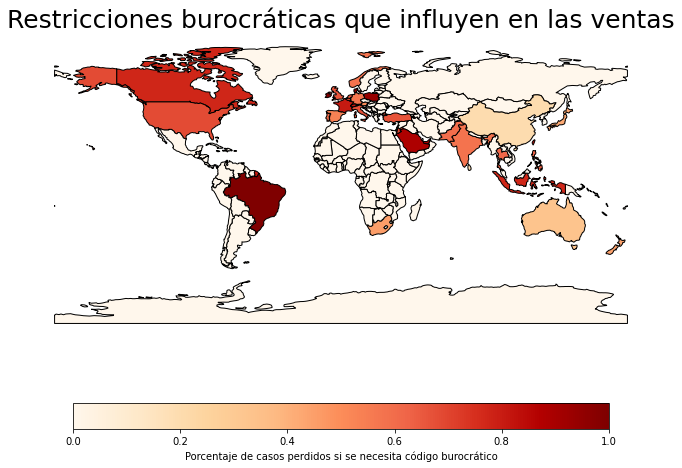

In [ ]:
# Graficamos utilizando GeoPandas
fig, ax = plt.subplots(figsize  = (12, 8))

gdf.plot(column='porcentaje_perdidos_con_codigo', \
          figsize=(15, 10), \
          cmap='OrRd', \
          edgecolor="black", \
          legend=True, \
          legend_kwds={'label': "Porcentaje de casos perdidos si se necesita código burocrático",\
                       'orientation':"horizontal",'shrink': 0.8},
            ax=ax)

ax.set_title("Restricciones burocráticas que influyen en las ventas", fontsize=25)
ax.set_axis_off()

Analizamos el caso en el que no se necesita código burocrático

In [ ]:
perdidosYGanadosNoNecesitanCod = casosPerdidosYGanados\
                        [casosPerdidosYGanados["Bureaucratic_Code_0_Approval"] == 0]\
                        .drop_duplicates(subset="Opportunity_ID")

casosPerdidos = perdidosYGanadosNoNecesitanCod["Stage"].value_counts()[1]

porcentajeDePerdidas = round(casosPerdidos / len(casosPerdidosYGanados),4)

porcentajesPorBillingCountrySinCod = perdidosYGanadosNoNecesitanCod.groupby("Billing_Country").\
                                agg({"Stage": [lambda x: (x=="Closed Won").sum() ,"count"]})
porcentajesPorBillingCountrySinCod.columns = ["count_casos_ganados","cantidad_total_casos"]

porcentajesPorBillingCountrySinCod["porcentaje_ganados"] = \
                porcentajesPorBillingCountrySinCod["count_casos_ganados"] / \
                porcentajesPorBillingCountrySinCod["cantidad_total_casos"]

porcentajesPorBillingCountrySinCod["porcentaje_perdido_sin_codigo"] = \
                1 - porcentajesPorBillingCountrySinCod["porcentaje_ganados"]


In [ ]:
porcentajesPorBillingCountrySinCod = porcentajesPorBillingCountrySinCod.reset_index()

porcentajesSinCodFilter = porcentajesPorBillingCountrySinCod[porcentajesPorBillingCountrySinCod \
                    ["cantidad_total_casos"] > 5]

porcentajesPorBillingCountrySinCodShorted = porcentajesSinCodFilter \
                                        [['Billing_Country','porcentaje_perdido_sin_codigo',
                                        'cantidad_total_casos']]

porcentajesPorBillingCountrySinCodShorted = porcentajesPorBillingCountrySinCodShorted.replace \
                                    ('United States', 'United States of America')

map_2 = porcentajesPorBillingCountrySinCodShorted.merge(worldShorted, how='right',right_on='name', \
                                        left_on='Billing_Country').fillna(0)

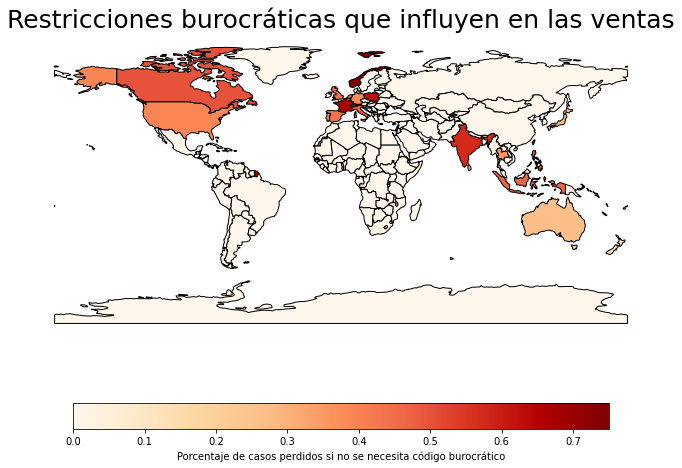

In [ ]:
gdf_2 = gpd.GeoDataFrame(map_2)

fig, ax = plt.subplots(figsize  = (12, 8))

gdf_2.plot(column='porcentaje_perdido_sin_codigo', \
          figsize=(15, 10), \
          cmap='OrRd', \
          edgecolor="black", \
          legend=True, \
          legend_kwds={'label': "Porcentaje de casos perdidos si no se necesita código burocrático",\
                       'orientation':"horizontal",'shrink': 0.8},
            ax=ax)

ax.set_title("Restricciones burocráticas que influyen en las ventas", fontsize=25)
ax.set_axis_off()

Procedemos a comparar los porcentajes mostrados en los dos mapas anteriores.

In [ ]:
dfComparativoPorcentajes = map_1[['Billing_Country','porcentaje_perdidos_con_codigo']]\
                            .merge(map_2[['Billing_Country','porcentaje_perdido_sin_codigo']],\
                            on='Billing_Country')

# limpio el DataFrame que se utilizo para graficar los mapas
dfComparativoPorcentajes = dfComparativoPorcentajes.\
                            loc[dfComparativoPorcentajes['Billing_Country']!=0]                            

In [ ]:
# Formateo el DataFrame para poder utilizarlo en Flourish y cumplir el formato
# que requiere el gráfico que quiero hacer.

perdidosConCodigo = dfComparativoPorcentajes[['Billing_Country','porcentaje_perdidos_con_codigo']]
perdidosConCodigo['necesita_codigo'] = "SI"
perdidosConCodigo = perdidosConCodigo.rename(columns={'porcentaje_perdidos_con_codigo':'porcentaje'})

perdidosSinCodigo = dfComparativoPorcentajes[['Billing_Country','porcentaje_perdido_sin_codigo']]
perdidosSinCodigo['necesita_codigo'] = "NO"
perdidosSinCodigo = perdidosSinCodigo.rename(columns={'porcentaje_perdido_sin_codigo':'porcentaje'})

dfComparativoPorcentajesSegunCodBurocratico = pd.concat([perdidosConCodigo, perdidosSinCodigo])

[texto del enlace](https://)## Performance de la Empresa a lo largo del tiempo

In [ ]:
entrenamientoShorted = entrenamientoDfProcesado[['ID','Opportunity_Created_Date',"Opportunity_ID"]].drop_duplicates(subset=["Opportunity_ID"])
entrenamientoShorted['Opportunity_Created_Date'] = pd.to_datetime(entrenamientoShorted['Opportunity_Created_Date'], errors='coerce')
entrenamientoShorted['Month'] = entrenamientoShorted['Opportunity_Created_Date'].dt.month
entrenamientoShorted['Year'] = entrenamientoShorted['Opportunity_Created_Date'].dt.year
groupedByYearAndMonth = entrenamientoShorted.groupby(['Year','Month']).agg({'ID':'count'})
groupedByYearAndMonth.columns = ['cant_oportunidades']
groupedByYearAndMonthResetIndex = groupedByYearAndMonth.reset_index()

In [ ]:
sin2013 = groupedByYearAndMonthResetIndex[groupedByYearAndMonthResetIndex['Year']!=2013]
oportPorMesPorAño = sin2013.pivot("Month", "Year", "cant_oportunidades")
oportPorMesPorAño.fillna(0, inplace=True)

¿Qué mes se generaron mas oportunidades?

In [ ]:
oportGeneradasPorMes = entrenamientoShorted.groupby('Month').agg({'Opportunity_ID':'count'})
oportGeneradasPorMes.reset_index(inplace=True)
oportGeneradasPorMes.rename(columns={"Opportunity_ID":"cant_oport"},inplace=True)

In [ ]:
# Conversión necesaria para poder graficar en Flourish
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
oportGeneradasPorMes['Month'] = meses

Vemos en que estado estan las oportunidades según el año

In [ ]:
stagePorAño = entrenamientoDfProcesado[['ID','Opportunity_Created_Date',"Opportunity_ID", "Stage"]].\
                drop_duplicates(subset=["Opportunity_ID"])

In [ ]:
stagePorAño['Opportunity_Created_Date'] = pd.to_datetime(stagePorAño['Opportunity_Created_Date'], errors='coerce')
stagePorAño['Month'] = stagePorAño['Opportunity_Created_Date'].dt.month
stagePorAño['Year'] = stagePorAño['Opportunity_Created_Date'].dt.year
stagePorAño = stagePorAño[stagePorAño['Year']!=2013]
stagePorAño = stagePorAño[(stagePorAño['Stage']=='Closed Won') | (stagePorAño['Stage'] == 'Closed Lost')]
grouped = stagePorAño.groupby(['Year','Stage']).agg({'ID':'count'})
groupedFinal = grouped.reset_index().rename(columns={'ID':'cant_oport'})
groupedFinal = groupedFinal.pivot(index='Year', columns='Stage', values='cant_oport').reset_index()

## Analisis sobre Regiones

### Porcentaje de oportunidades segun region

In [ ]:
# Pregunta: Cual es la relacion entre la cantidad de casos con casos cerrados de manera exitosa por region ?
auxiliar_df = entrenamientoDfProcesado

#Eliminamos los Opportunity_Name duplicados para tener la cantidad neta de oportunidades
auxiliar_df = auxiliar_df.drop_duplicates(subset='Opportunity_Name')

# Nos guardamos en la columna Stage_Won los casos terminados en Closed Won
auxiliar_df["Stage_Won"] = auxiliar_df["Stage"] == "Closed Won"
auxiliar_df["Stage_Lost"] = auxiliar_df["Stage"] == "Closed Lost"

# Agrupo segun region y sus cantidades de Stages y Stages_Won
#casos_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage": "count", "Stage_Won" : "count"})
casos_ganados_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage_Won" : ['mean']}).reset_index()


casos_perdidos_segun_region =  auxiliar_df.groupby(["Region"]).agg({"Stage_Lost" : ['mean']}).reset_index()

porcentaje_ganados_perdidos_region = casos_perdidos_segun_region.merge(casos_ganados_segun_region)
porcentaje_ganados_perdidos_region["Other"] = 1 - (porcentaje_ganados_perdidos_region["Stage_Won"] + porcentaje_ganados_perdidos_region["Stage_Lost"])
porcentaje_ganados_perdidos_region.to_csv("porcentaje_stages_regiones.csv")

### Oportunidades perdidas por region

In [ ]:
#Analisis casos perdidos region
casos_perdidos_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage_Lost" : ['sum']})
casos_perdidos_segun_region.columns = ['Oportunidades perdidas']
casos_perdidos_segun_region.to_csv("casos_perdidos_segun_region.csv")

### Relacion oportunidades ganadas y totales

In [ ]:
#Grafico mejorado
plt.figure(figsize=(15,8))

x = casos_ganados_segun_region.index
y = casos_ganados_segun_region['Casos ganados']
z = casos_ganados_segun_region['Cantidad de oportunidades']

relacion_totales_ganadas_plot = plt.subplot(111)
relacion_totales_ganadas_plot.bar(x, z, width=0.5, color='lightseagreen', align='center')
relacion_totales_ganadas_plot.bar(x, y, width=0.5, color='tab:green', align='center')

relacion_totales_ganadas_plot.set_title('Relacion entre oportunidades ganadas y totales por region',fontsize=25)
relacion_totales_ganadas_plot.set_xlabel("Region",fontsize=15)
relacion_totales_ganadas_plot.set_ylabel("Cantidad",fontsize=15)
relacion_totales_ganadas_plot.legend(['Total de oportunidades','Casos ganados'],fontsize=15)


## Analisis de productos


### Analisis de las familias de productos


In [ ]:
familiaDeProductos = entrenamientoDfProcesado[["Stage","Product_Family","Product_Name","Opportunity_Created_Date","Region"]]
familiaDeProductos = familiaDeProductos[familiaDeProductos["Stage"].eq("Closed Won")]
familiaDeProductos

In [ ]:
familiaDeProductos = familiaDeProductos[familiaDeProductos["Stage"].eq("Closed Won")]
ventasPorfamiliaDeProductosDf = familiaDeProductos.groupby(["Product_Family","Product_Name"]).agg({"Stage":"count"})
ventasPorfamiliaDeProductosDf.columns = ["Count_ventas"]
ventasPorfamiliaDeProductosDf["maximo_Count_en_Familia"] = ventasPorfamiliaDeProductosDf.groupby("Product_Family")["Count_ventas"].transform(lambda x: x.max())
ventasPorfamiliaDeProductosDf[ventasPorfamiliaDeProductosDf.Count_ventas == ventasPorfamiliaDeProductosDf.maximo_Count_en_Familia].nlargest(15,"Count_ventas")

In [ ]:
familiaDeProductos["Opportunity_Year"] = pd.to_datetime(familiaDeProductos["Opportunity_Created_Date"]).dt.year

In [ ]:
familiasMasVendidasPorAnio = familiaDeProductos.groupby(["Opportunity_Year","Product_Family"]).agg({"Product_Name":"count"})
familiasMasVendidasPorAnio.columns = ["cantidad_ventas_total"]
familiasMasVendidasPorAnio.reset_index(inplace =  True)
familiasMasVendidasPorAnio["cantidad_ventas_maxima"] = familiasMasVendidasPorAnio[["Opportunity_Year","cantidad_ventas_total"]].groupby(["Opportunity_Year"]).cantidad_ventas_total.transform("max")

In [ ]:
familiasMasVendidasPorAnio_filtrado = familiasMasVendidasPorAnio[familiasMasVendidasPorAnio.cantidad_ventas_total >= familiasMasVendidasPorAnio.cantidad_ventas_maxima]
familiasMasVendidasPorAnio_filtrado = familiasMasVendidasPorAnio_filtrado[["Opportunity_Year","Product_Family","cantidad_ventas_maxima"]]
familiasMasVendidasPorAnio_filtrado

### Análisis de distribucion de ventas de la mejor familia por region

In [ ]:
familiasSerie = familiasMasVendidasPorAnio_filtrado.Product_Family.drop_duplicates()

In [ ]:
familiaDeProductos_short = familiaDeProductos[["Product_Family","Opportunity_Created_Date","Region"]]

In [ ]:
familiaDeProductos_short["Opportunity_Year"] = pd.to_datetime(familiaDeProductos_short["Opportunity_Created_Date"]).dt.year
familiaDeProductos_short = familiaDeProductos_short.merge(familiasSerie,how="inner",on="Product_Family")
familiaDeProductos_short["Opportunity_Year"] = familiaDeProductos_short["Opportunity_Year"].astype("int64")
familiaDeProductos_short

In [ ]:
# Analisis para el año 2014
familiasMasVendidasEn2014 = familiaDeProductos_short["Product_Family"].eq("Product_Family_158")  | familiaDeProductos_short["Product_Family"].eq("Product_Family_164") 
opportunityYear2014 = familiaDeProductos_short["Opportunity_Year"].eq(2014)
familiaDeProductosMasVendidas2014 = familiaDeProductos_short[familiasMasVendidasEn2014 & opportunityYear2014]
familiaDeProductosMasVendidas2014 = familiaDeProductosMasVendidas2014.groupby(["Opportunity_Year","Region","Product_Family"]).agg({"Opportunity_Created_Date":"count"}).reset_index()
familiaDeProductosMasVendidas2014.columns = ["Year","Region","Product_family","ventas"]
familiaDeProductosMasVendidas2014

In [ ]:
# Analisis para el año 2015
familiasMasVendidasEn2015 = familiaDeProductos_short["Product_Family"].eq("Product_Family_77") 
opportunityYear2015 = familiaDeProductos_short["Opportunity_Year"].eq(2015)
familiaDeProductosMasVendidas2015 = familiaDeProductos_short[familiasMasVendidasEn2015 & opportunityYear2015]
familiaDeProductosMasVendidas2015 = familiaDeProductosMasVendidas2015.groupby(["Opportunity_Year","Region","Product_Family"]).agg({"Opportunity_Created_Date":"count"}).reset_index()
familiaDeProductosMasVendidas2015.columns = ["Year","Region","Product_family","ventas"]
familiaDeProductosMasVendidas2015

In [ ]:
# Analisis para el año 2016
familiasMasVendidasEn2016 = familiaDeProductos_short["Product_Family"].eq("Product_Family_77") 
opportunityYear2016 = familiaDeProductos_short["Opportunity_Year"].eq(2016)
familiaDeProductosMasVendidas2016 = familiaDeProductos_short[familiasMasVendidasEn2016 & opportunityYear2016]
familiaDeProductosMasVendidas2016 = familiaDeProductosMasVendidas2016.groupby(["Opportunity_Year","Region","Product_Family"]).agg({"Opportunity_Created_Date":"count"}).reset_index()
familiaDeProductosMasVendidas2016.columns = ["Year","Region","Product_family","ventas"]
familiaDeProductosMasVendidas2016

In [ ]:
# Analisis para el año 2017
familiasMasVendidasEn2017 = familiaDeProductos_short["Product_Family"].eq("Product_Family_133") 
opportunityYear2017 = familiaDeProductos_short["Opportunity_Year"].eq(2017)
familiaDeProductosMasVendidas2017 = familiaDeProductos_short[familiasMasVendidasEn2017 & opportunityYear2017]
familiaDeProductosMasVendidas2017 = familiaDeProductosMasVendidas2017.groupby(["Opportunity_Year","Region","Product_Family"]).agg({"Opportunity_Created_Date":"count"}).reset_index()
familiaDeProductosMasVendidas2017.columns = ["Year","Region","Product_family","ventas"]
familiaDeProductosMasVendidas2017

In [ ]:
# Analisis para el año 2018
familiasMasVendidasEn2018 = familiaDeProductos_short["Product_Family"].eq("Product_Family_133") 
opportunityYear2018 = familiaDeProductos_short["Opportunity_Year"].eq(2018)
familiaDeProductosMasVendidas2018 = familiaDeProductos_short[familiasMasVendidasEn2018 & opportunityYear2018]
familiaDeProductosMasVendidas2018 = familiaDeProductosMasVendidas2018.groupby(["Opportunity_Year","Region","Product_Family"]).agg({"Opportunity_Created_Date":"count"}).reset_index()
familiaDeProductosMasVendidas2018.columns = ["Year","Region","Product_family","ventas"]
familiaDeProductosMasVendidas2018

In [ ]:
familiasMasVendidasConcat = pd.concat([familiaDeProductosMasVendidas2014,\
           familiaDeProductosMasVendidas2015,\
           familiaDeProductosMasVendidas2016,\
           familiaDeProductosMasVendidas2017,\
           familiaDeProductosMasVendidas2018])
familiasMasVendidasConcat["index"] = familiasMasVendidasConcat["Year"].astype(str) +  " - " + familiasMasVendidasConcat["Product_family"]
familiasMasVendidasConcat = familiasMasVendidasConcat.pivot(index='index', columns='Region', values='ventas').fillna(0).reset_index()
familiasMasVendidasConcat["Middle East"] = 0.0

In [ ]:
familiasMasVendidasConcat.to_csv("distribucion_de_ventas_por_region_anio_familias")

### Analisis productos mas requeridos por region

In [ ]:
familiaDeProductosPorRegion = entrenamientoDfProcesado[["Stage","Product_Family","Product_Name","Region"]]
familiaDeProductosPorRegion

In [ ]:
ventasConcretadas = familiaDeProductosPorRegion["Stage"] == "Closed Won"
productos_por_region = familiaDeProductosPorRegion[["Product_Name","Region","Stage"]]
cantidad_ventas_minimas = 5
productos_por_region = productos_por_region[ventasConcretadas].groupby(["Region","Product_Name"]).agg({"Stage":"count"})
productos_por_region.columns = ["ventas"]
productos_por_region.reset_index().Region.value_counts()

In [ ]:
ventasProductosConcretadas = familiaDeProductosPorRegion[familiaDeProductosPorRegion.Stage.eq("Closed Won")]
ventasProductosConcretadas = ventasProductosConcretadas[["Product_Family","Product_Name","Region"]]
ventasProductosConcretadas["cantidad_ventas"] = 1
ventasProductosConcretadas.groupby(["Region","Product_Name"]).agg({"cantidad_ventas":"sum"})

In [ ]:
ventasPorCountry = ventasProductosConcretadas.groupby(["Region","Product_Family"]).agg({"cantidad_ventas":"max"})

In [ ]:
ventasPorCountry

### Top 5 Productos Por Region


In [ ]:
productosPorRegion = entrenamientoDfProcesado[["Product_Name","Stage","Region"]]
ventas_concretadas = productosPorRegion[productosPorRegion.Stage.eq("Closed Won")]
ventas_concretadas = ventas_concretadas.groupby(["Region","Product_Name"]).agg({"Stage":"count"}).reset_index()
ventas_concretadas.columns = ["Region","Product","ventas"]

In [ ]:
ventas_concretadas.Region.value_counts()

In [ ]:
ventasEnJapon = ventas_concretadas[ventas_concretadas.Region == "Japan"]
top5Japon = ventasEnJapon.nlargest(5,"ventas")

In [ ]:
ventasEnApac = ventas_concretadas[ventas_concretadas.Region == "APAC"]
top5Apac = ventasEnApac.nlargest(5,"ventas")

In [ ]:
ventasEnEmea = ventas_concretadas[ventas_concretadas.Region == "EMEA"]
top5Emea =ventasEnEmea.nlargest(5,"ventas")

In [ ]:
ventasEnAmericas = ventas_concretadas[ventas_concretadas.Region == "Americas"]
top5americas = ventasEnAmericas.nlargest(5,"ventas")

In [ ]:
ventasEnMiddle = ventas_concretadas[ventas_concretadas.Region == "Middle East"]
top5middleEast = ventasEnMiddle.nlargest(5,"ventas")

In [ ]:
pd.concat([top5americas,\
           top5Apac,\
           top5Emea,\
           top5Japon,\
           top5middleEast]).to_csv("top5_productos_por_region")

### Los 10 productos con mayor recaudación


In [ ]:
# Me quedo con un df mas chico para el análisis que necesito
ventasPorProd = df_closed_won.loc[:, ('Product_Name','Stage','Total_Taxable_Amount_Millions_USD')]
ventasPorProdGrouped = ventasPorProd.groupby('Product_Name').agg({'Total_Taxable_Amount_Millions_USD':'sum'})
los10ProdMasVendidos = ventasPorProdGrouped.nlargest(10, 'Total_Taxable_Amount_Millions_USD').reset_index(inplace=True)
los10ProdMasVendidos.to_csv("los10ProdMasVendidos.csv")

###  Los 10 productos más y menos vendidos.

In [ ]:
productos = entrenamientoDfProcesado
productos["Oportunidades_ganadas"] = productos["Stage"] == "Closed Won"

productos["Oportunidades_perdidas"] = productos["Stage"] == "Closed Lost"

productos_oportunidades_ganadas = productos.groupby("Product_Name").agg({"Oportunidades_ganadas" : "sum"}).reset_index()
productos_oportunidades_perdidas = productos.groupby("Product_Name").agg({"Oportunidades_perdidas" : "sum"}).reset_index()

productos_oportunidades_perdidas = productos_oportunidades_perdidas.nlargest(10, "Oportunidades_perdidas")

productos_oportunidades_ganadas = productos_oportunidades_ganadas.nlargest(10, "Oportunidades_ganadas")

productos_oportunidades_ganadas_perdidas  = productos_oportunidades_ganadas.append(productos_oportunidades_perdidas)
productos_oportunidades_ganadas_perdidas.to_csv("oportunidades_perdidas_ganadas.csv")              

## Análisis sobre TRF

In [ ]:
#Armo el dataframe con la informacion a analizar
analisis_TRF = entrenamientoDfProcesado.loc[:,['Total_Amount','TRF','Total_Amount_Currency','ASP','ASP_(converted)',\
                                      'Opportunity_Owner','ASP_Currency','Product_Name','Stage','Total_Amount_USD']]

### Analisis de ventas según TRF


In [ ]:
porcentajeDe0 = (analisis_TRF.TRF.value_counts()[0])/(analisis_TRF.TRF.count()) * 100
porcentajeDe0

#Vemos que hay casi 12000 items que tienen TRF = 0,teniendo en cuenta que hay alrededor de 16000 filas esta cantidad es 
#bastante significativa.

70.63787100961822

In [ ]:
#Para este analisis consideraremos aquellos productos que tengan un valor de TRF > 0
productosAAnalizar = analisis_TRF[analisis_TRF.TRF > 0]
promedio_TRF_por_producto = productosAAnalizar.groupby('Product_Name')['TRF'].transform('mean')
coincidePromedioConTRF = promedio_TRF_por_producto == productosAAnalizar.TRF
coincidePromedioConTRF.value_counts()
#Vemos que hay casos de productos cuyo valor de TRF es distinto del promedio.Esto nos dice que para ese producto no hay
#un unico valor de TRF.Es esto correcto?tiene sentido?

True     2869
False    2107
Name: TRF, dtype: int64

In [ ]:
#Para evitar el problema de multiples TRF para un producto decidimos agrupar por cantidad de TRF
#Agrupamos por TRF

agrupadosPorTRF = productosAAnalizar.groupby(['TRF']).agg({'Product_Name':'count','Total_Amount_USD':'sum'})
agrupadosPorTRF.columns = ['Cant_Oportunidades_Totales','Total_Amount_USD_Posibles']
agrupadosPorTRF.head()

,Cant_Oportunidades_Totales,Total_Amount_USD_Posibles
TRF,,
1,2192,"799,122,401.12"
2,627,"513,110,939.51"
3,354,"449,605,335.42"
4,208,"596,227,378.78"
5,297,"654,341,111.79"


In [ ]:
#ahora filtramos las oportunidades ganadas
agrupadosPorTRFSoloGanados = productosAAnalizar[productosAAnalizar.Stage == 'Closed Won'].groupby(['TRF']).agg({'Product_Name':'count','Total_Amount_USD':'sum'})
agrupadosPorTRFSoloGanados.columns = ['Cant_Oportunidades_Ganadas','Total_Amount_USD_Ganados']
agrupadosPorTRFSoloGanados.head()

,Cant_Oportunidades_Ganadas,Total_Amount_USD_Ganados
TRF,,
1,866,"303,234,422.94"
2,167,"136,913,684.52"
3,76,"99,201,029.11"
4,44,"74,521,924.80"
5,38,"93,579,759.45"


In [ ]:
Cant_Oportunidades_Perdidas = productosAAnalizar[productosAAnalizar.Stage == 'Closed Lost'].groupby(['TRF']).agg({'Product_Name':'count'})
Cant_Oportunidades_Perdidas.columns = ['Cant_Oportunidades_Perdidas']
agrupadosPorTRFMergeado = agrupadosPorTRF.merge(agrupadosPorTRFSoloGanados,on='TRF',how='left')
agrupadosPorTRFMergeado['Cant_Oportunidades_Perdidas'] = Cant_Oportunidades_Perdidas
agrupadosPorTRFMergeado = agrupadosPorTRFMergeado.fillna(0) 
agrupadosPorTRFMergeado.head()

,Cant_Oportunidades_Totales,Total_Amount_USD_Posibles,Cant_Oportunidades_Ganadas,Total_Amount_USD_Ganados,Cant_Oportunidades_Perdidas
TRF,,,,,
1,2192,"799,122,401.12",866.00,"303,234,422.94",1311
2,627,"513,110,939.51",167.00,"136,913,684.52",454
3,354,"449,605,335.42",76.00,"99,201,029.11",277
4,208,"596,227,378.78",44.00,"74,521,924.80",162
5,297,"654,341,111.79",38.00,"93,579,759.45",256


In [ ]:
agrupadosPorTRFMergeadoSoloGanados = agrupadosPorTRFMergeado.loc[agrupadosPorTRFMergeado.Cant_Oportunidades_Ganadas > 0]
agrupadosPorTRFMergeadoSoloGanados.head()
#este es finalmente el df usado para crear la visualizacion de esta seccion

,Cant_Oportunidades_Totales,Total_Amount_USD_Posibles,Cant_Oportunidades_Ganadas,Total_Amount_USD_Ganados,Cant_Oportunidades_Perdidas
TRF,,,,,
1,2192,"799,122,401.12",866.00,"303,234,422.94",1311
2,627,"513,110,939.51",167.00,"136,913,684.52",454
3,354,"449,605,335.42",76.00,"99,201,029.11",277
4,208,"596,227,378.78",44.00,"74,521,924.80",162
5,297,"654,341,111.79",38.00,"93,579,759.45",256


## Analisis sobre rango entrega

### Rango de entrega y porcentaje de exito

In [ ]:
# Me copio en una aux el DataFrame.
segun_fechas = entrenamientoDfProcesado

# Cambie el Planned_Delivery_Start_Date de type object a datetime.
segun_fechas["Planned_Delivery_Start_Date"]= pd.to_datetime(segun_fechas["Planned_Delivery_Start_Date"])

# Cambie el Planned_Delivery_End_Date de type object a datetime.
segun_fechas["Planned_Delivery_End_Date"]= pd.to_datetime(segun_fechas["Planned_Delivery_End_Date"])

segun_fechas["Rango_Entrega"] = segun_fechas["Planned_Delivery_End_Date"] - segun_fechas["Planned_Delivery_Start_Date"]

# Me quedo con los casos ganados
segun_fechas["Stage_Won"] = segun_fechas["Stage"] == "Closed Won"

# Agrupo por Familia de Producto y fechas de planeado entrega inicial y final.
segun_fechas['Rango_Entrega'] = segun_fechas['Rango_Entrega'].astype('timedelta64[D]')

# HIPOTESIS : Mientras mas rapdio entregen los productos los vendedores, mayor porcentaje de exito.
segun_fechas_vendedores = segun_fechas.groupby("Opportunity_Owner").agg({"Rango_Entrega" : "mean", "Stage_Won" : "mean"})

entrega_mas_rapida_mas_exito = segun_fechas_vendedores[(segun_fechas_vendedores[["Stage_Won"]] != 0).all(axis=1)]

entrega_mas_rapida_mas_exito = entrega_mas_rapida_mas_exito.nsmallest(5, "Rango_Entrega")
entrega_mas_lenta = segun_fechas_vendedores.nlargest(5, "Rango_Entrega")

porcentaje_entrega_mas_rapido_mas_lento = entrega_mas_rapida_mas_exito.append(entrega_mas_lenta)

porcentaje_entrega_mas_rapido_mas_lento["Stage_Won"] = porcentaje_entrega_mas_rapido_mas_lento["Stage_Won"] * 100
porcentaje_entrega_mas_rapido_mas_lento.to_csv("porcentaje_entrega_mas_rapido_mas_lento.csv")

### Rango de entrega segun Regiones

In [ ]:
#Analisamos segun la region
segun_fechas_region = segun_fechas.groupby("Region").agg({"Rango_Entrega" : "mean"}).drop_duplicates()

# Segun fechas de entrega por region
segun_fechas_region.to_csv("promedio_entrega_region.csv")

## Analisis sobre requerimiento de aprobacion especial

### Stages y sus aprobaciones especiales

In [ ]:
# Vemos el  exito segun si necesita una aprobacion especial.
necesita_delivery_terms_stage = entrenamientoDfProcesado.groupby("Stage").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum"})
necesita_delivery_terms_stage.to_csv("necesita_delivery_terms_stage.csv")

### Porcentaje de oportunidades segun region

In [ ]:
#Vemos el porcentaje de aprobacion especial segun la region
necesita_delivery_terms_region = entrenamientoDfProcesado.groupby("Region").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum", "Opportunity_ID" : "count"}).reset_index()

necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"]= necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"].astype(float)
necesita_delivery_terms_region["Opportunity_ID"] = necesita_delivery_terms_region["Opportunity_ID"].astype(float)

necesita_delivery_terms_region["Porcentaje_requerimiento_aprovacion"] = (necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"] / necesita_delivery_terms_region["Opportunity_ID"]) * 100

porcentaje_aprobacion_req_region = necesita_delivery_terms_region[["Region", "Porcentaje_requerimiento_aprovacion"]]

porcentaje_aprobacion_req_region.to_csv("porcentaje_aprobacion_req_region.csv")

### Paises con mayor requerimiento de aprobacion especial

In [ ]:
# 10 Billing_Country con mayor requerimiento de aprovacion especial
aprobacion_segun_territorio = entrenamientoDfProcesado
aprobacion_segun_territorio = aprobacion_segun_territorio.groupby("Billing_Country").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum"})
paises_con_mayor_requerimiento_aprobacion = aprobacion_segun_territorio["Pricing, Delivery_Terms_Quote_Appr"].nlargest(10).reset_index()
paises_con_mayor_requerimiento_aprobacion.to_csv("paises_con_mayor_requerimiento_aprobacion.csv")